## W3&W4 post studio exercises (errors, model fitting)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

***
We will use 

* [who-health-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/who-health-data.csv)

* [wisconsin-cancer-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/kaggle-wisconsin-cancer.csv)

throughout the exercises. Download the datasets into the same directory as your post-studio notebook.

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [150]:
who_data_2015 = (
    pd.read_csv("who-health-data.csv") # Read in the csv data.
    .rename(columns=lambda c: c.strip())      # Clean up column names.
    .query("Year == 2015")                    # Restrict the dataset to records from 2015.
    # Removes two columns which contain a lot of missing data...
    .drop(columns=["Alcohol", "Total expenditure","Country"])
    # ... then drop any rows with missing values.
    .dropna()
)

wisconsin_cancer_biopsies = (
    pd.read_csv("kaggle-wisconsin-cancer.csv")
    # This tidies up the naming of results (M -> malignant, B -> benign)
    .assign(diagnosis=lambda df: df['diagnosis']  
        .map({"M": "malignant", "B": "benign"})
        .astype('category')
    )
)

### Exercise 1

Given the dataframe `ex1_who_with_predictions` below, compute the Mean Absolute Error for the predicted values of life expectancy. You can repeat the process previously shown, or find a function in `sklearn.metrics` to compute this for you.

In [153]:
ex1_who_with_predictions = (
    who_data_2015[["Schooling", "Life expectancy"]]
    .assign(Predicted=lambda df: df["Schooling"] * 2.3 + 43)
    .dropna()
)
ex1_who_with_predictions.head()

,Schooling,Life expectancy,Predicted
0,10.1,65.0,66.23
16,14.2,77.8,75.66
32,14.4,75.6,76.12
48,11.4,52.4,69.22
80,17.3,76.3,82.79


In [155]:
mae = (
    ex1_who_with_predictions
    .pipe(lambda df: np.abs(df['Life expectancy'] - df['Predicted']))  # Compute absolute errors
    .pipe(np.mean)  # Compute the mean of absolute errors
)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.790230769230769


### Exercise 2

Given the classification predictions and actual results in the dataframe `ex2_biopsies_with_predictions` below, compute accuracy, precision and recall. Also find the number of false negatives.

In [158]:
ex2_biopsies_with_predictions = (
    wisconsin_cancer_biopsies
    .assign(prediction=lambda df: df['texture_mean'].lt(20)
        .map({True: "benign", False: "malignant"})
    )
    [['radius_mean', 'texture_mean', 'diagnosis', 'prediction']]
)
ex2_biopsies_with_predictions.head()

,radius_mean,texture_mean,diagnosis,prediction
0,17.99,10.38,malignant,benign
1,20.57,17.77,malignant,benign
2,19.69,21.25,malignant,malignant
3,11.42,20.38,malignant,malignant
4,20.29,14.34,malignant,benign


In [160]:
actual = ex2_biopsies_with_predictions['diagnosis']
predicted = ex2_biopsies_with_predictions['prediction']

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label="benign")
recall = recall_score(actual, predicted, pos_label="benign")

# Compute false negatives
false_negatives = (
    ex2_biopsies_with_predictions
    .pipe(lambda df: (df['diagnosis'] == "benign") & (df['prediction'] != "benign"))  # Identify false negatives
    .sum()  # Count false negatives
)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"False Negatives: {false_negatives}")


Accuracy: 0.73
Precision: 0.80
Recall: 0.77
False Negatives: 83


### Exercise 3

Consider three different predictors for the cancer biopsy screening dataset:

* Predictor A has an accuracy of 0.95, and recall of 0.99
* Predictor B has an accuracy of 0.99, and recall of 0.95
* Predictor C has an accuracy of 0.5, and a recall of 1.0

The test required to collect data from a new patient (on which the predictor will give a predicted diagnosis) is minimally invasive. If the predictor predicts a positive (malignant) diagnosis, the patient will be referred for further screening which can be expensive.

Considering the context, which predictive model (A, B, or C) would likely be preferred for this task? Write your answer in a markdown cell below, and give a brief explanation of your reasoning.

ANSWER:

The preferred predictive model is B. This is because has the highest accuracy rate with 0.99 out of the three predicitive models presented. Furthermore, the recall is very good because a high recall value of 0.95 indicates the percentage of real positive results which were correctly identified. However, it could be argued that Predictor A is a good model. This is due to the high recall (0.99) and slightly smaller accuracy (0.95), which may be preferred as the percentage of real positive results is close to 1.00. 

### Exercise 4

Choose one different input/feature variable (other than Schooling) and fit a linear regression model to predict Life Expectancy using sklearn. Can you achieve a better error rate than what we found in pre-studio notebook? (RMSE and MAE for Schooling were 4.71 and 3.69, respectively.) Suggest a method to narrow down your choices of variables to use in order to arrive at a good model. 

Hint 1: Correlation.

Hint 2: You can use the functions written in the pre-studio notebook, e.g. prediction_root_mean_squared_error(gradient, intercept), to calculate the model error once you choose your model parameters (features).

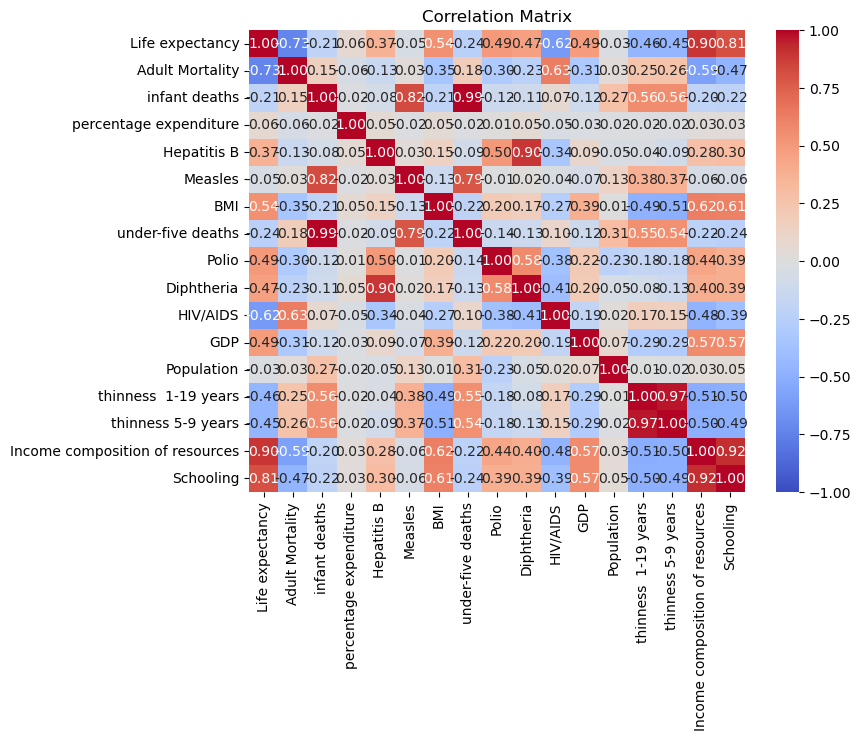

In [295]:
who_data_2015 = (
    pd.read_csv("who-health-data.csv") 
    .rename(columns=lambda c: c.strip())     
    .query("Year == 2015")                    
    .drop(columns=["Alcohol", "Total expenditure","Country","Status","Year"])
    .dropna()
)

df = who_data_2015

import seaborn as sns
import matplotlib.pyplot as plt

# Create and display the heatmap in a method chain
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1).figure.set_size_inches(8, 6)
plt.title('Correlation Matrix')
plt.show()

The correlation heatmap shows that Income composition of resources and Adult mortaility have high positive correlation of 0.9 and 0.73, respectively. Since Income composition of resources has a stronger correlation due to being closer to 1, then I would pick Income composition of resources to predict life expectancy.

Mean Absolute Error (MAE): 2.7371964876087294
Root Mean Squared Error (RMSE): 3.504293642534378
Model is y = 47.50x + 38.69
R-squared (R²): 0.81


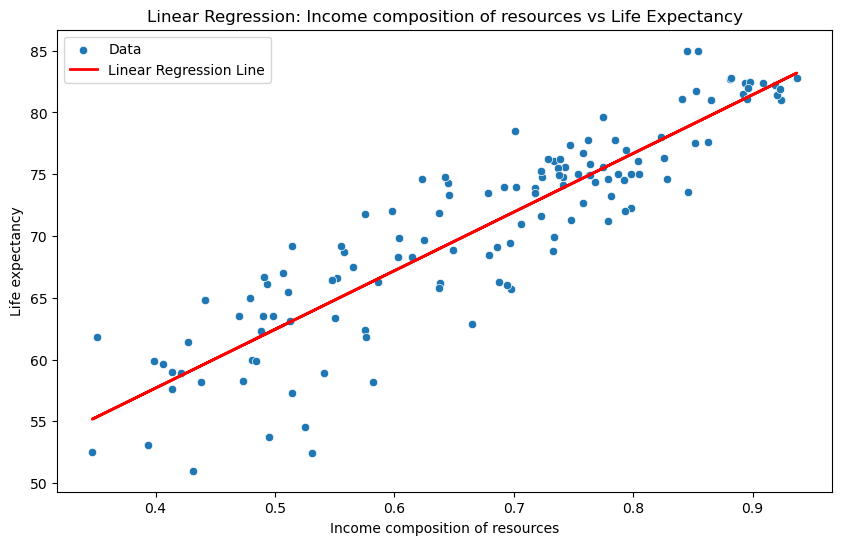

In [312]:
X = who_data_2015[["Income composition of resources"]].values  # Feature/Independent variable: Income composition of resources
y = who_data_2015["Life expectancy"].values  # Target/dependent variable: Life expectancy

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}");
print("Model is y = {:.2f}x + {:.2f}".format(optimal_gradient, optimal_intercept))

from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HIV_AIDS_data, x="Income composition of resources", y="Life expectancy", label="Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Linear Regression Line")
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.title("Linear Regression: Income composition of resources vs Life Expectancy")
plt.legend()
plt.show()

The RMSE for Schooling (4.79) is higher than the RMSE for Income composition of Resources (3.50). A higher RMSE value suggests that the Schooling data is more sensitive to larger errors because of the outliers within the data. Therefore, the lower RMSE value is better because it means that the data has smaller errors in comparison to the Schooling data.

Furthermore, the MAE for Schooling (3.69) is higher Income composition of resources' MAE (2.74). A higher MAE value indicates that the prediction values are further away from the actual values. Thus, the lower MAE implies the prediction is closer to the actual values.

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5*

The function `model_correct_predictions` below returns the number of correct predictions made by a predictive model for the cancer biopsy dataset, for a given parameter value. This parameter value simply controls the threshold value for radius above which a sample is predicted as malignant.

Try different values of the parameter in this model within the range [0, 30]. Record and plot the resulting accuracy values against the parameter value (similar to the regression cost function example above).

What value of the parameter provides the best error rate? Explain how can you be confident you have found the best result here.

In [17]:
def model_correct_predictions(radius_split_parameter):
    """ Return the number of correct predictions made by the model
    for the given parameter value. """
    data = wisconsin_cancer_biopsies.assign(
        predicted=lambda df: df['radius_mean'].lt(radius_split_parameter)
            .map({True: "benign", False: "malignant"})
    )
    return (data['diagnosis'] == data['predicted']).sum()

model_correct_predictions(12)

369

### Exercise 6*

In examples in pre-studio notebook (W4) we have used root mean squared error (the standard cost function for linear regression) to fit the model parameters. Try re-running the `scipy.optimise` method using mean absolute error. Are the resulting model parameters the same as above? Give some brief reasoning why there might be a difference here.

In [20]:
# Hint: you only need to make one small change in the prediction_error function to do this.

In [22]:
def prediction_root_mean_squared_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    # Note that `squared=False` gives us RMSE. Then we're in the same units as MAE.
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)

### Exercise 7*

We can see above that different methods for determining model parameters arrive at the same result, but what happens if we change the dataset slightly. Experiment by taking several (at least 10) different samples of the data, fitting a linear model for each one, and plotting a histogram of the different gradient and intercept coefficients you find. Is there a significant amount of variation in the parameter values?

In [7]:
sample_data = who_data_2015.sample(30)  # selects a small sample of 30 random rows from the data.